# Introduction to Logistic Regression

Welcome to this introduction to Logistic Regression!

## Overview

Logistic Regression is a powerful and widely-used algorithm in the field of machine learning, especially for binary classification problems. It is employed to predict the probability of an instance belonging to a particular class. In this brief overview.

## Key Concepts

- **Logistic Function:** Understand the core of Logistic Regression with the logistic function, which maps raw scores to probabilities.
- **Decision Boundary:** Learn about the decision boundary and how it separates different classes.
- **Training Process:** Get insights into how Logistic Regression is trained using optimization techniques.

## What to Expect

In this exploration, we'll cover:

- **Generating Synthetic Data:** Create a feature space and labels for training logistic regression.
- **Calculating Logits:** Understand how logits are computed as the raw scores.
- **Applying the Logistic Function:** Transform logits into probabilities using the logistic function.

Let's embark on the journey to unravel the concepts and applications of Logistic Regression!


In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression

C:\Users\16462\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np

def sigmoid(z):
    """
    Compute the logistic function for a given input.

    Parameters:
    - z (float or numpy.ndarray): The input value or array.

    Returns:
    - float or numpy.ndarray: The result of applying the logistic function to the input.
    """
    sigmoid = 1 / (1 + np.exp(-z))
    assert np.all((sigmoid >= 0) & (sigmoid <= 1))
    return sigmoid


In [3]:
# True coefficients for a linear model.
true_coefficients = np.array([[4], [-2]])
print('The true coefficients represent the weights assigned to features in the linear model:\n'+str(true_coefficients))

The true coefficients represent the weights assigned to features in the linear model:
[[ 4]
 [-2]]


In [4]:
# Number of training data points.
num_data_points = 2000

# Generate feature values from a uniform distribution U[0, 1].
# np.random.seed(1)
# Creating a feature matrix X with dimensions (num_data_points, num_features).
# In this example, num_features is determined by the shape of the true coefficients 'true_coefficients'.
# Each row of X corresponds to a data point with feature values randomly sampled from U[0, 1].
feature_matrix = np.random.rand(num_data_points, true_coefficients.shape[0])

# Displaying the first five rows of the feature matrix.
print('Random feature space is a 2D space:\n', feature_matrix[:5])


Random feature space is a 2D space:
 [[0.05713163 0.49573718]
 [0.32033864 0.74048921]
 [0.62219268 0.44417616]
 [0.88262689 0.9899602 ]
 [0.77776184 0.92908011]]


In [5]:
# Calculate logits.
logits_true = np.dot(feature_matrix, true_coefficients)

# The logits represent the raw, unnormalized predictions of the linear model before applying the logistic function.
# It is obtained by taking the dot product of the feature matrix and the true coefficients.

# Calculate probabilities using the logistic function.
probabilities_true = sigmoid(logits_true)

# The probabilities_true represent the output of the logistic function applied to the logits.
# These probabilities are used to represent the likelihood of each data point belonging to a certain class,
# in binary classification problems.

# Shape of the resulting probabilities.
probabilities_true.shape


(2000, 1)

In [6]:
binary_labels = np.random.binomial(1, probabilities_true.flatten())

# Display the first five generated binary labels.
print('Generated binary labels:\n', binary_labels[:5])


Generated binary labels:
 [0 1 1 1 1]


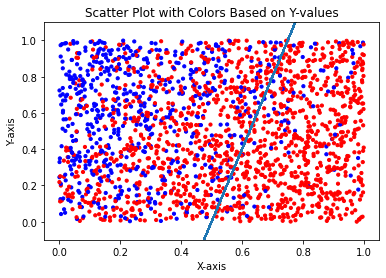

In [7]:
import matplotlib.pyplot as plt

colors = ['blue' if label == 0 else 'red' for label in binary_labels]
plt.scatter(feature_matrix[:, 0], feature_matrix[:, 1], c=colors, marker='o', s=10)

plt.plot(feature_matrix[:, 0] ,true_coefficients[0]* feature_matrix[:, 0] +true_coefficients[1] )

plt.ylim(-.1,1.1)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Colors Based on Y-values')
plt.show()

In [8]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_matrix, binary_labels, test_size=0.25, random_state=16)

In [9]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

logreg.coef_[0]

array([ 3.9604785 , -1.83710698])

In [10]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 73,  77],
       [ 49, 301]], dtype=int64)

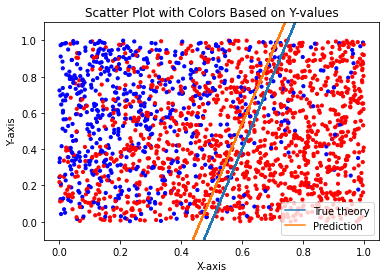

In [11]:
plt.scatter(feature_matrix[:, 0], feature_matrix[:, 1], c=colors, marker='o', s=10)

plt.plot(feature_matrix[:, 0] ,true_coefficients[0]* feature_matrix[:, 0] +true_coefficients[1] , label = 'True theory' )

plt.plot(feature_matrix[:, 0] ,logreg.coef_[0][0]* feature_matrix[:, 0] +logreg.coef_[0][1], label = 'Prediction' )

plt.ylim(-.1,1.1)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Colors Based on Y-values')
plt.legend()
plt.show()

## learning algorithm using gradient descent


**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$


In [12]:
Y = binary_labels
X = feature_matrix
X

array([[0.05713163, 0.49573718],
       [0.32033864, 0.74048921],
       [0.62219268, 0.44417616],
       ...,
       [0.92971276, 0.12742408],
       [0.43163879, 0.43312572],
       [0.35822891, 0.6543597 ]])

In [13]:
X.shape

(2000, 2)

In [14]:
w = np.zeros((1,X.shape[1]))
w

array([[0., 0.]])

In [19]:
# Initialize an empty list to store the cost values during each iteration.
costs = []

# Number of iterations.
itr = 100000

# Iterate over the specified number of iterations.
for i in range(itr):
    # Set the learning rate.
    learning_rate = 0.01
    
    # Number of training examples.
    m = X.shape[0]
    
    # Calculate the linear combination of features and weights.
    z = np.dot(w, X.T)
    
    # Apply the logistic function to obtain predicted probabilities.
    y_hat = sigmoid(z)
    
    # Compute the logistic regression cost function.
    cost = np.sum(((-np.log(y_hat[0])) * Y + (-np.log(1 - y_hat[0])) * (1 - Y))) / m
    
    # Compute the gradient of the cost function with respect to the weights.
    dw = -(np.dot(Y - y_hat[0], X)) / m

    # Update the weights using gradient descent.
    w = w - (learning_rate * dw)

    # Append the current cost to the list for later analysis.
    costs.append(cost)

# Display the final learned weights after the iterations.
print("Final learned weights (w):", w)


Final learned weights (w): [[ 4.14719669 -2.01518121]]


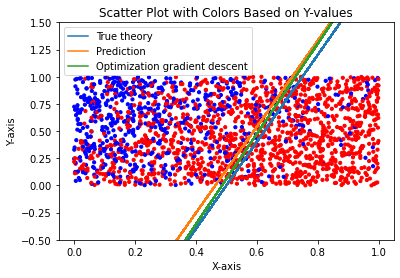

In [20]:
plt.scatter(feature_matrix[:, 0], feature_matrix[:, 1], c=colors, marker='o', s=10)

plt.plot(feature_matrix[:, 0] ,true_coefficients[0]* feature_matrix[:, 0] +true_coefficients[1] , label = 'True theory' )

plt.plot(feature_matrix[:, 0] ,logreg.coef_[0][0]* feature_matrix[:, 0] +logreg.coef_[0][1], label = 'Prediction' )

plt.plot(feature_matrix[:, 0] , w[0][0]* feature_matrix[:, 0] + w[0][1], label = 'Optimization gradient descent' )

plt.ylim(-.5,1.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Colors Based on Y-values')
plt.legend()
plt.show()